In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [5]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
data.shape

(891, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
cat_data = ['Pclass','Sex','SibSp','Parch','Embarked','Cabin']

cont_data = ['Age','Fare']

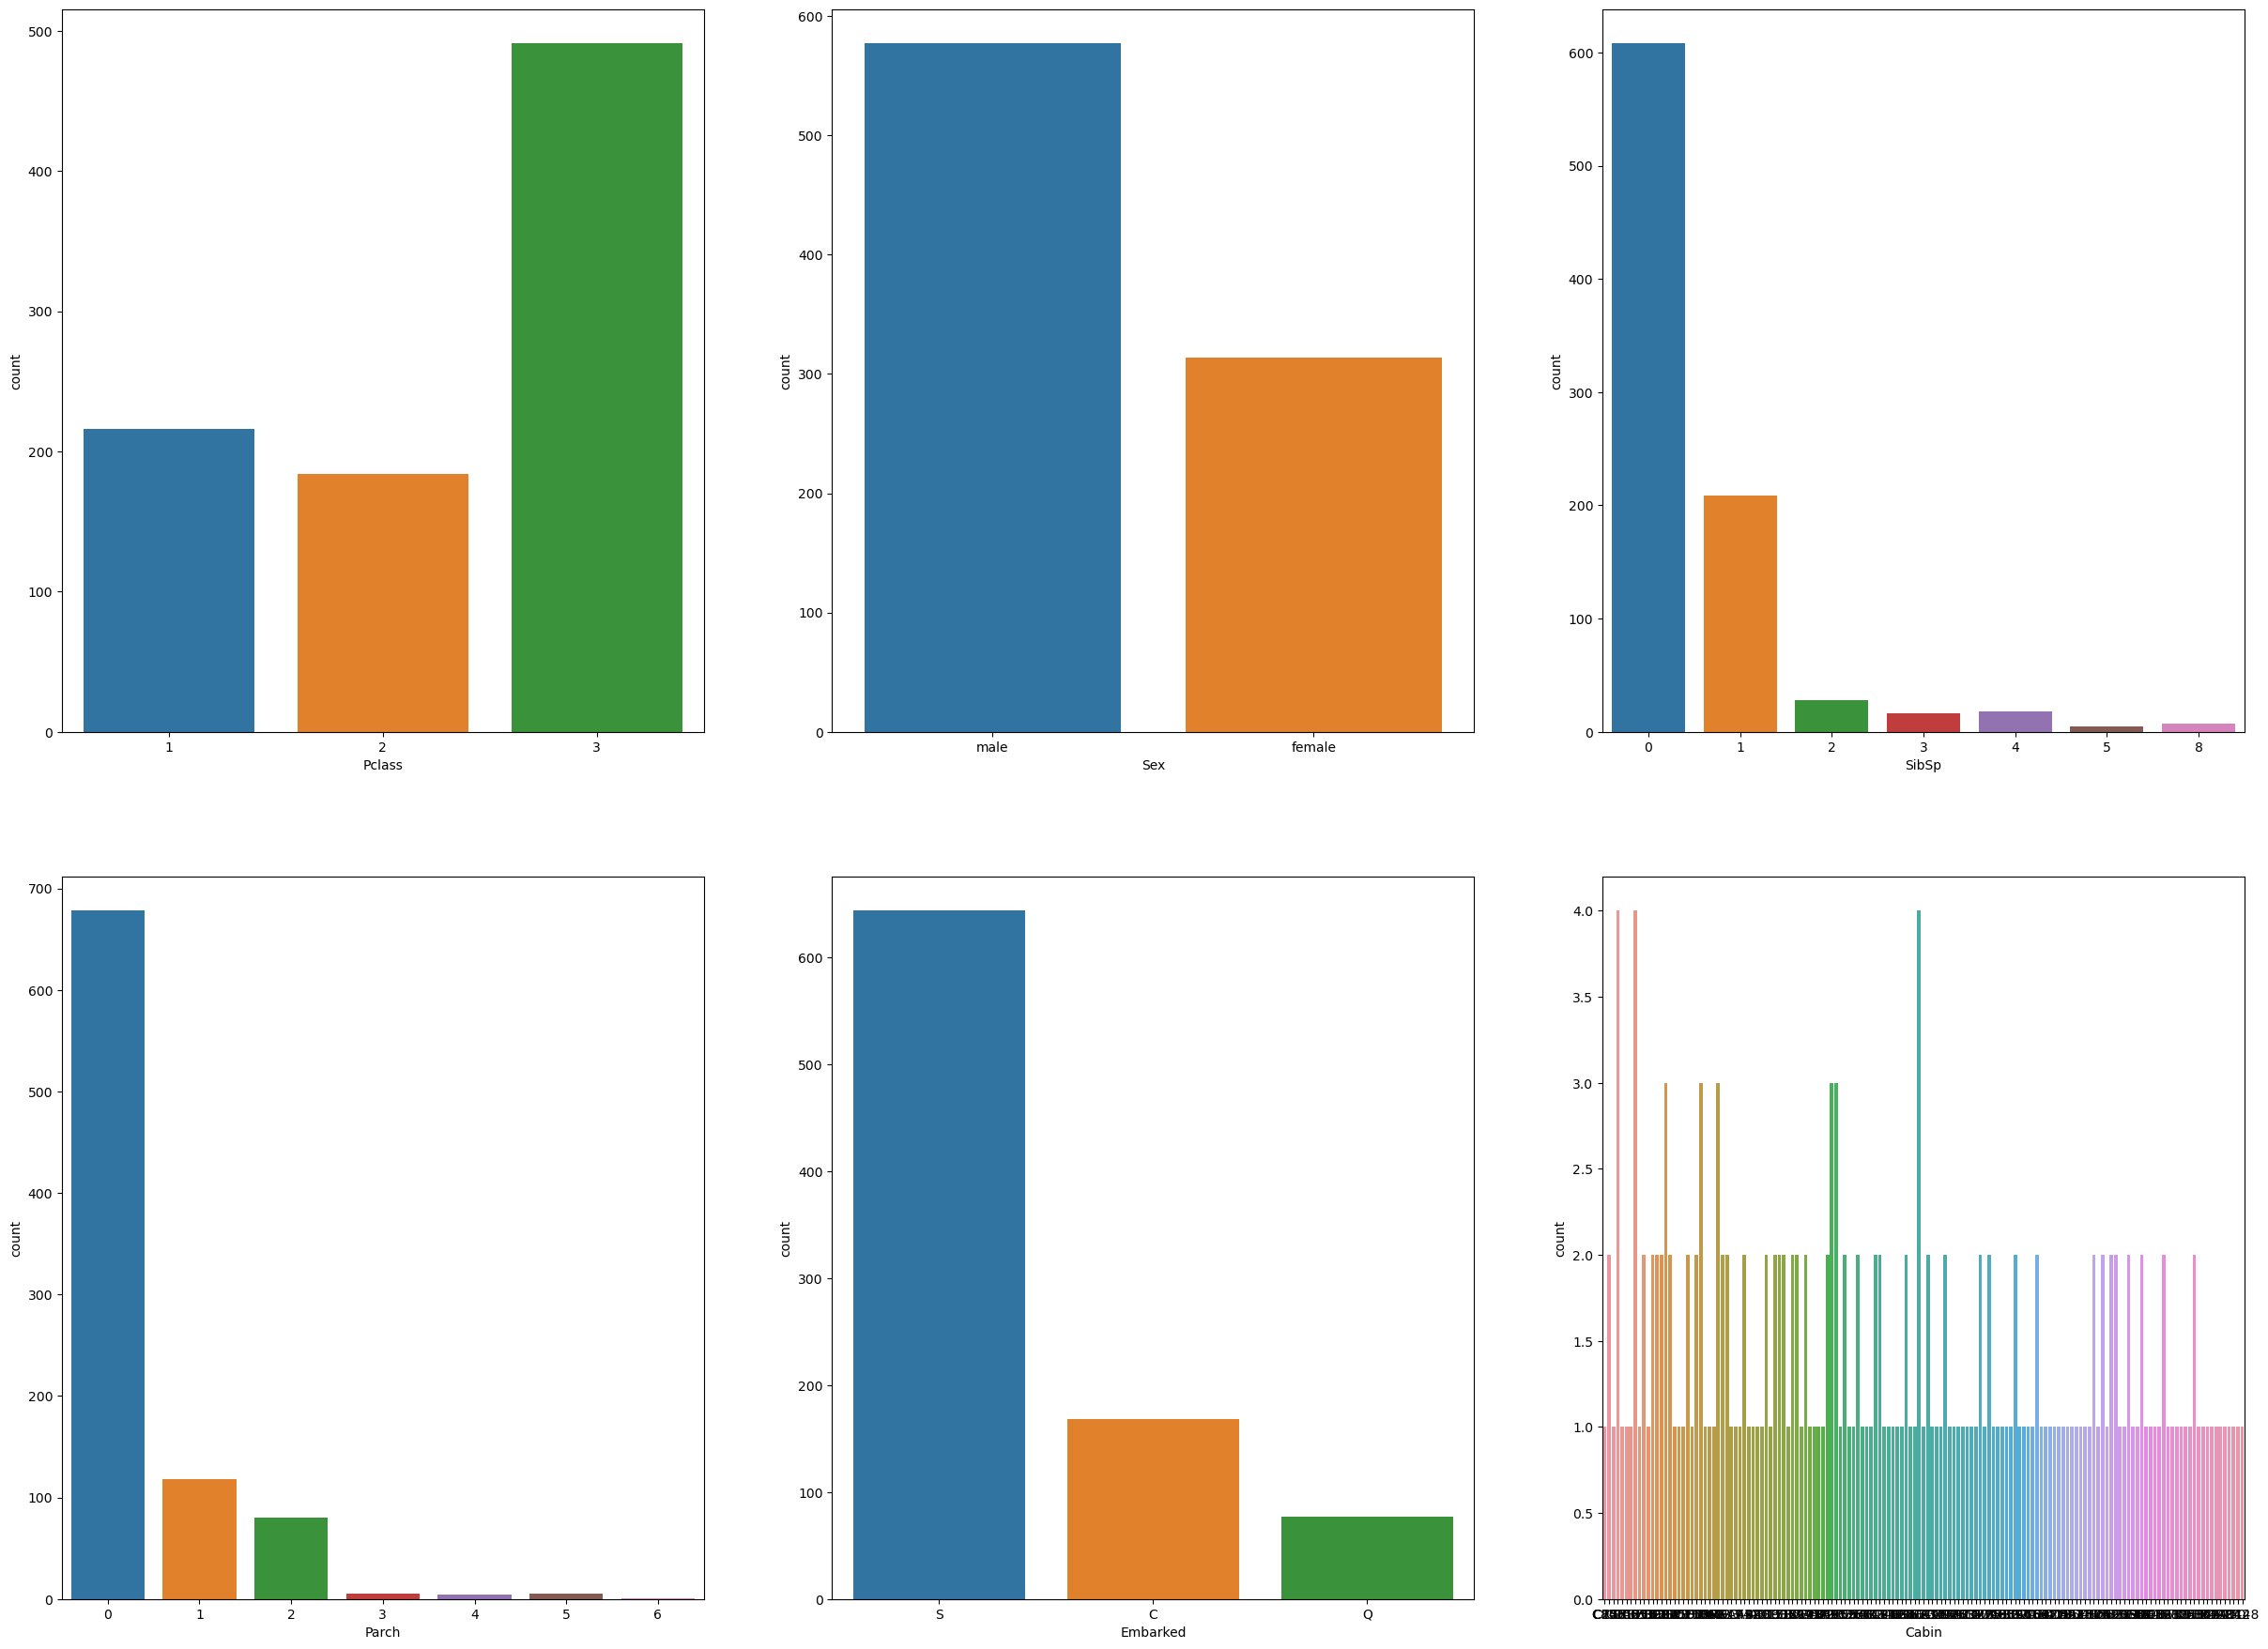

In [9]:
plt.figure(figsize=(30,22))

plotnumber=1

for column in data[cat_data]:
    if plotnumber <=6:
        plt.subplot(2,3,plotnumber)
        sns.countplot(x=data[cat_data][column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [10]:
for i in data[cat_data]:
    print(f"{i}\n{data[cat_data][i].value_counts()}\n")

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex
male      577
female    314
Name: Sex, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64



In [11]:
data['Cabin'].fillna('Unknown',inplace=True)

In [12]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
dtype: int64

In [13]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [14]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [15]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [25]:
for i in data['Cabin']:
    data['Cabin'].replace(i,i[0],inplace=True)

In [26]:
data['Cabin']

0      U
1      C
2      U
3      C
4      U
      ..
886    U
887    B
888    U
889    C
890    U
Name: Cabin, Length: 891, dtype: object

In [27]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,U,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,U,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,U,S


In [28]:
data['Cabin'].nunique()

9

In [29]:
data['Cabin'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
data['Sex'] = le.fit_transform(data['Sex'])

In [33]:
data['Cabin'] = le.fit_transform(data['Cabin'])

In [34]:
data['Embarked'] = le.fit_transform(data['Embarked'])

In [35]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,8,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,8,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,8,2


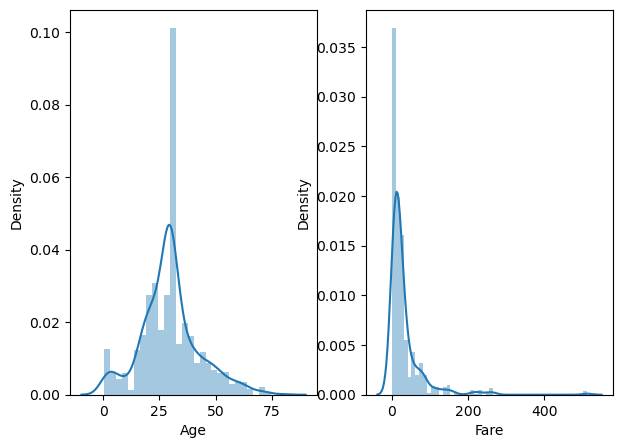

In [38]:
plt.figure(figsize=(7,5))

plotnumber=1

for column in data[cont_data]:
    if plotnumber <=2:
        plt.subplot(1,2,plotnumber)
        sns.distplot(data[cont_data][column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [39]:
from sklearn.preprocessing import PowerTransformer

In [40]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Cabin      -1.546140
Embarked   -1.264823
dtype: float64

In [41]:
pt = PowerTransformer()

In [42]:
data[cont_data] = pt.fit_transform(data[cont_data])

In [43]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,-0.556267,1,0,-0.878820,8,2
1,1,1,0,0.657269,1,0,1.336651,2,0
2,1,3,0,-0.241577,0,0,-0.790065,8,2
3,1,1,0,0.437923,1,0,1.067352,2,2
4,0,3,1,0.437923,0,0,-0.774439,8,2


In [44]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.064420
SibSp       3.695352
Parch       2.749117
Fare       -0.040329
Cabin      -1.546140
Embarked   -1.264823
dtype: float64

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [46]:
x = data.drop('Survived',axis=1)

y = data['Survived']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=89)

# LR

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(x_train,y_train)

LogisticRegression()

In [51]:
pred1 = lr.predict(x_train)

In [52]:
pred2 = lr.predict(x_test)

In [53]:
print(f"Trainning Accuracy {accuracy_score(y_train,pred1)}")

Trainning Accuracy 0.7874251497005988


In [54]:
print(f"Test Accuracy {accuracy_score(y_test,pred2)}")

Test Accuracy 0.8071748878923767


In [67]:
cv = cross_val_score(lr,x,y)

cv_mean = cv.mean()

cv_mean

0.7890025735986441

In [56]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       140
           1       0.76      0.71      0.73        83

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



In [57]:
print(confusion_matrix(y_test,pred2))

[[121  19]
 [ 24  59]]


# knn

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier()

In [60]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [61]:
pred1 = knn.predict(x_train)

In [62]:
pred2 = knn.predict(x_test)

In [63]:
print(f"Trainning Accuracy {accuracy_score(y_train,pred1)}")

Trainning Accuracy 0.8383233532934131


In [64]:
print(f"Test Accuracy {accuracy_score(y_test,pred2)}")

Test Accuracy 0.7982062780269058


In [68]:
cv = cross_val_score(knn,x,y)

cv_mean = cv.mean()

cv_mean

0.8024919967359236

In [65]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       140
           1       0.73      0.72      0.73        83

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [66]:
print(confusion_matrix(y_test,pred2))

[[118  22]
 [ 23  60]]


# DT

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt = DecisionTreeClassifier()

In [72]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
pred1 = dt.predict(x_train)

In [74]:
pred2 = dt.predict(x_test)

In [75]:
print(f"Trainning Accuracy {accuracy_score(y_train,pred1)}")

Trainning Accuracy 0.9880239520958084


In [76]:
print(f"Test Accuracy {accuracy_score(y_test,pred2)}")

Test Accuracy 0.8026905829596412


In [77]:
cv = cross_val_score(dt,x,y)

cv_mean = cv.mean()

cv_mean

0.7912937040989266

In [78]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       140
           1       0.72      0.77      0.74        83

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.79       223
weighted avg       0.81      0.80      0.80       223



In [79]:
print(confusion_matrix(y_test,pred2))

[[115  25]
 [ 19  64]]


# RF

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf = RandomForestClassifier()

In [82]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [83]:
pred1 = rf.predict(x_train)

In [84]:
pred2 = rf.predict(x_test)

In [85]:
print(f"Trainning Accuracy {accuracy_score(y_train,pred1)}")

Trainning Accuracy 0.9865269461077845


In [86]:
print(f"Test Accuracy {accuracy_score(y_test,pred2)}")

Test Accuracy 0.8565022421524664


In [87]:
cv = cross_val_score(rf,x,y)

cv_mean = cv.mean()

cv_mean

0.8092461239093591

In [88]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.81      0.81      0.81        83

    accuracy                           0.86       223
   macro avg       0.85      0.85      0.85       223
weighted avg       0.86      0.86      0.86       223



In [89]:
print(confusion_matrix(y_test,pred2))

[[124  16]
 [ 16  67]]


# ADA

In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
ada = AdaBoostClassifier()

In [92]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [93]:
pred1 = ada.predict(x_train)

In [94]:
pred2 = ada.predict(x_test)

In [95]:
print(f"Trainning Accuracy {accuracy_score(y_train,pred1)}")

Trainning Accuracy 0.8278443113772455


In [96]:
print(f"Test Accuracy {accuracy_score(y_test,pred2)}")

Test Accuracy 0.7937219730941704


In [97]:
cv = cross_val_score(ada,x,y)

cv_mean = cv.mean()

cv_mean

0.8036344234511329

In [98]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       140
           1       0.74      0.69      0.71        83

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



In [99]:
print(confusion_matrix(y_test,pred2))

[[120  20]
 [ 26  57]]


# GBDT

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
gb = GradientBoostingClassifier()

In [102]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [103]:
pred1 = gb.predict(x_train)

In [104]:
pred2 = gb.predict(x_test)

In [105]:
print(f"Trainning Accuracy {accuracy_score(y_train,pred1)}")

Trainning Accuracy 0.9026946107784432


In [106]:
print(f"Test Accuracy {accuracy_score(y_test,pred2)}")

Test Accuracy 0.8251121076233184


In [107]:
cv = cross_val_score(gb,x,y)

cv_mean = cv.mean()

cv_mean

0.815956311593748

In [108]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       140
           1       0.82      0.67      0.74        83

    accuracy                           0.83       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.83      0.82       223



In [109]:
print(confusion_matrix(y_test,pred2))

[[128  12]
 [ 27  56]]


# XGB

In [110]:
from xgboost import XGBClassifier

In [112]:
xg = XGBClassifier()

In [113]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [114]:
pred1 = xg.predict(x_train)

In [115]:
pred2 = xg.predict(x_test)

In [116]:
print(f"Trainning Accuracy {accuracy_score(y_train,pred1)}")

Trainning Accuracy 0.9730538922155688


In [117]:
print(f"Test Accuracy {accuracy_score(y_test,pred2)}")

Test Accuracy 0.8340807174887892


In [118]:
cv = cross_val_score(xg,x,y)

cv_mean = cv.mean()

cv_mean

0.8238214801330738

In [119]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       140
           1       0.81      0.72      0.76        83

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



In [120]:
print(confusion_matrix(y_test,pred2))

[[126  14]
 [ 23  60]]


# SVM

In [121]:
from sklearn.svm import SVC

In [122]:
svc = SVC()

In [123]:
svc.fit(x_train,y_train)

SVC()

In [124]:
pred1 = svc.predict(x_train)

In [126]:
pred2 = svc.predict(x_test)

In [127]:
print(f"Trainning Accuracy {accuracy_score(y_train,pred1)}")

Trainning Accuracy 0.7964071856287425


In [128]:
print(f"Test Accuracy {accuracy_score(y_test,pred2)}")

Test Accuracy 0.8071748878923767


In [129]:
cv = cross_val_score(svc,x,y)

cv_mean = cv.mean()

cv_mean

0.7968551879982424

In [130]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       140
           1       0.74      0.75      0.74        83

    accuracy                           0.81       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



In [131]:
print(confusion_matrix(y_test,pred2))

[[118  22]
 [ 21  62]]


# ADA boost is the best model accuracy wise

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
ada = AdaBoostClassifier()

In [134]:
para = {'algorithm':['SAMME','SAMME.R'],
       'learning_rate':np.arange(1,10,0.1)}

In [135]:
gs = GridSearchCV(ada,para,n_jobs=1)

In [136]:
gs.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])})

In [137]:
gs.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.8000000000000007}

In [138]:
gs.best_estimator_.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.8000000000000007)

In [139]:
pred1 = gs.best_estimator_.predict(x_train)

In [141]:
pred2 = gs.best_estimator_.predict(x_test)

In [142]:
print(f"Trainning Accuracy {accuracy_score(y_train,pred1)}")

Trainning Accuracy 0.8233532934131736


In [143]:
print(f"Test Accuracy {accuracy_score(y_test,pred2)}")

Test Accuracy 0.8116591928251121


In [144]:
cv = cross_val_score(svc,x,y)

cv_mean = cv.mean()

cv_mean

0.7968551879982424

In [145]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       140
           1       0.77      0.70      0.73        83

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



In [146]:
print(confusion_matrix(y_test,pred2))

[[123  17]
 [ 25  58]]


In [147]:
from sklearn.metrics import roc_auc_score, roc_curve

In [150]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,pred2)

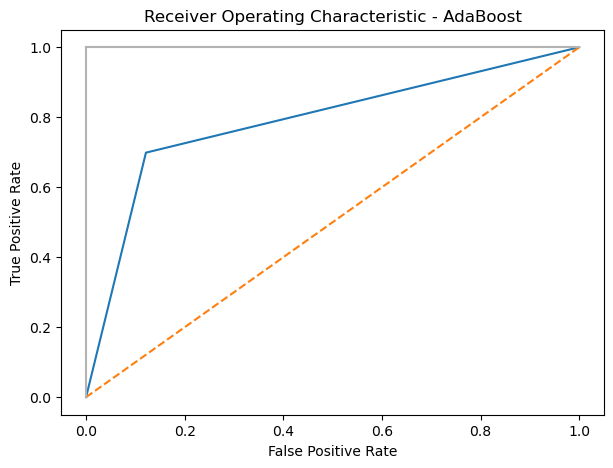

In [153]:
plt.subplots(1, figsize=(7,5))
plt.title('Receiver Operating Characteristic - AdaBoost')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [152]:
print('roc_auc_score for ADABOOST: ', roc_auc_score(y_test,pred2))

roc_auc_score for ADABOOST:  0.7886833046471601


In [154]:
conc = pd.DataFrame({'Actual':y_test,"Predicted":pred2})

In [155]:
conc

,Actual,Predicted
291,1,1
366,1,1
14,0,1
463,0,0
314,0,0
...,...,...
1,1,1
468,0,0
124,0,0
12,0,0
